# Project MVP

In [113]:
import pickle
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
sns.set_style("whitegrid")

In [2]:
# Load the data
with open('data.pickle', 'rb') as g:
    df = pickle.load(g)

In [3]:
df.tail()

,b_batters_used,b_age_bat,b_runs_per_game,b_G,b_PA,b_AB,b_R,b_H,b_2B,b_3B,...,f_PO,f_A,f_E_def,f_DP_def,f_fielding_perc,f_tz_runs_total,f_tz_runs_total_per_season,f_bis_runs_total_team,f_bis_runs_total_per_season_team,f_bis_runs_good_plays
1193,50.0,28.5,4.12,132.0,4897.0,4362.0,544.0,1046.0,210.0,19.0,...,3458.0,1203.0,74.0,102.0,0.984,31.0,4.0,55,3,1
1194,56.0,27.5,5.35,133.0,5108.0,4524.0,712.0,1082.0,240.0,23.0,...,3592.0,1131.0,68.0,110.0,0.986,19.0,2.0,46,0,-3
1195,54.0,27.0,3.88,133.0,4885.0,4428.0,516.0,1016.0,184.0,17.0,...,3514.0,1198.0,71.0,117.0,0.985,82.0,9.0,59,0,0
1196,60.0,26.7,4.97,132.0,4917.0,4444.0,656.0,1166.0,221.0,11.0,...,3433.0,1135.0,78.0,100.0,0.983,49.0,6.0,2,0,2
1197,56.0,29.1,4.40,131.0,4872.0,4308.0,577.0,1108.0,210.0,15.0,...,3363.0,1110.0,80.0,95.0,0.982,-5.0,-1.0,19,0,8


In [10]:
# keep only numeric variables and remove columns without enough observations (the last 3)
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
baseball = df.select_dtypes(include=numerics)

In [11]:
baseball.columns

Index(['b_batters_used', 'b_age_bat', 'b_runs_per_game', 'b_G', 'b_PA', 'b_AB',
       'b_R', 'b_H', 'b_2B', 'b_3B', 'b_HR', 'b_RBI', 'b_SB', 'b_CS', 'b_BB',
       'b_SO', 'b_batting_avg', 'b_onbase_perc', 'b_slugging_perc',
       'b_onbase_plus_slugging', 'b_onbase_plus_slugging_plus', 'b_TB',
       'b_GIDP', 'b_HBP', 'b_SH', 'b_SF', 'b_IBB', 'b_LOB', 'p_pitchers_used',
       'p_age_pitch', 'p_runs_allowed_per_game', 'p_W', 'p_L',
       'p_win_loss_perc', 'p_earned_run_avg', 'p_G', 'p_GS', 'p_GF', 'p_CG',
       'p_SHO_team', 'p_SHO_cg', 'p_SV', 'p_IP', 'p_H', 'p_R', 'p_ER', 'p_HR',
       'p_BB', 'p_IBB', 'p_SO', 'p_HBP', 'p_BK', 'p_WP', 'p_batters_faced',
       'p_earned_run_avg_plus', 'p_fip', 'p_whip', 'p_hits_per_nine',
       'p_home_runs_per_nine', 'p_bases_on_balls_per_nine',
       'p_strikeouts_per_nine', 'p_strikeouts_per_base_on_balls', 'p_LOB',
       'f_fielders_used', 'f_runs_allowed_per_game', 'f_defensive_efficiency',
       'f_G', 'f_GS', 'f_CG', 'f_Inn_def', '

## Clean up the dataframe a bit. Removing some redundant columns.

In [12]:
columns_to_be_dropped = ['b_batters_used', 'b_G', 'b_age_bat', 'b_PA', 'b_AB',
                        'p_pitchers_used', 'p_age_pitch', 'p_W', 'p_L',
                         'p_G', 'p_GS', 'p_GF', 'p_IP',
                        'f_fielders_used', 'f_G', 'f_GS', 'f_CG', 'f_Inn_def']
baseball = baseball.drop(columns=columns_to_be_dropped)

In [21]:
# directly plug a linear regression model to see how it goes

X = baseball.drop(columns='p_win_loss_perc')
X = sm.add_constant(X)
y = baseball['p_win_loss_perc']
model = sm.OLS(y, X)
car_model = model.fit()
car_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        p_win_loss_perc   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     271.4
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        00:06:33   Log-Likelihood:                 3065.0
No. Observations:                1198   AIC:                            -6016.
Df Residuals:                    1141   BIC:                            -5726.
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -5.9030      1.258     -4.693      0.000      -8.371      -3.435
b_runs_per_game                   -0.0844      0.020     -4.298      0.000      -0.123      -0.046
b_R                                0.0012      0.000      7.154      0.000       0.001       0.002
b_H                               -0.0006      0.000     -5.709      0.000      -0.001      -0.000
b_2B                           -9.336e-06   3.08e-05     -0.303      0.762   -6.98e-05    5.12e-05
b_3B                            -1.31e-05   5.83e-05     -0.225      0.822      -0.000       0.000
b_HR                               0.0001   3.93e-05      3.545      0.000    6.23e-05       0.000
b_RBI                              0.0001   9.06e-05      1.300      0.194   -5.99e-05       0.000
b_SB                            4.071e-05   2.31e-05      1.762      0.078   -4.63e-06    8.61e-05
b_CS                           -9.766e-05   8.02e-05     -1.218      0.224      -0.000    5.97e-05
b_BB                              -0.0009   9.57e-05     -9.853      0.000      -0.001      -0.001
b_SO                             3.35e-06   7.13e-06      0.470      0.638   -1.06e-05    1.73e-05
b_batting_avg                     -1.4489      0.623     -2.324      0.020      -2.672      -0.226
b_onbase_perc                      1.3395      1.233      1.087      0.277      -1.079       3.758
b_slugging_perc                   -3.3639      1.208     -2.784      0.005      -5.734      -0.994
b_onbase_plus_slugging             4.3696      1.197      3.650      0.000       2.021       6.718
b_onbase_plus_slugging_plus        0.0003      0.000      1.149      0.251      -0.000       0.001
b_TB                              -0.0003   5.79e-05     -4.330      0.000      -0.000      -0.000
b_GIDP                          1.903e-05   6.65e-05      0.286      0.775      -0.000       0.000
b_HBP                             -0.0009      0.000     -8.808      0.000      -0.001      -0.001
b_SH                              -0.0003   5.24e-05     -5.993      0.000      -0.000      -0.000
b_SF                              -0.0001   9.01e-05     -1.246      0.213      -0.000    6.45e-05
b_IBB                              0.0002   5.89e-05      3.919      0.000       0.000       0.000
b_LOB                              0.0003   5.64e-05      5.099      0.000       0.000       0.000
p_runs_allowed_per_game            0.0722      0.011      6.542      0.000       0.051       0.094
p_earned_run_avg                  -0.1408      0.026     -5.492      0.000      -0.191      -0.091
p_CG                               0.0008      0.000      6.037      0.000       0.001       0.001
p_SHO_team                         0.0009      0.000      3.692      0.000       0.000       0.001
p_SHO_cg      

## Select 12 features to investigate further.

In [225]:
features = ['b_runs_per_game', 'b_RBI', 'b_onbase_perc', 'b_slugging_perc', 'b_onbase_plus_slugging',
            'p_runs_allowed_per_game', 'p_earned_run_avg', 'p_SV', 'p_SO', 'p_whip',
            'f_E_def', 'f_fielding_perc']

In [226]:
X = baseball[features]
y = baseball['p_win_loss_perc']
smaller_baseball = pd.concat([X, y], axis=1)
X = sm.add_constant(X)

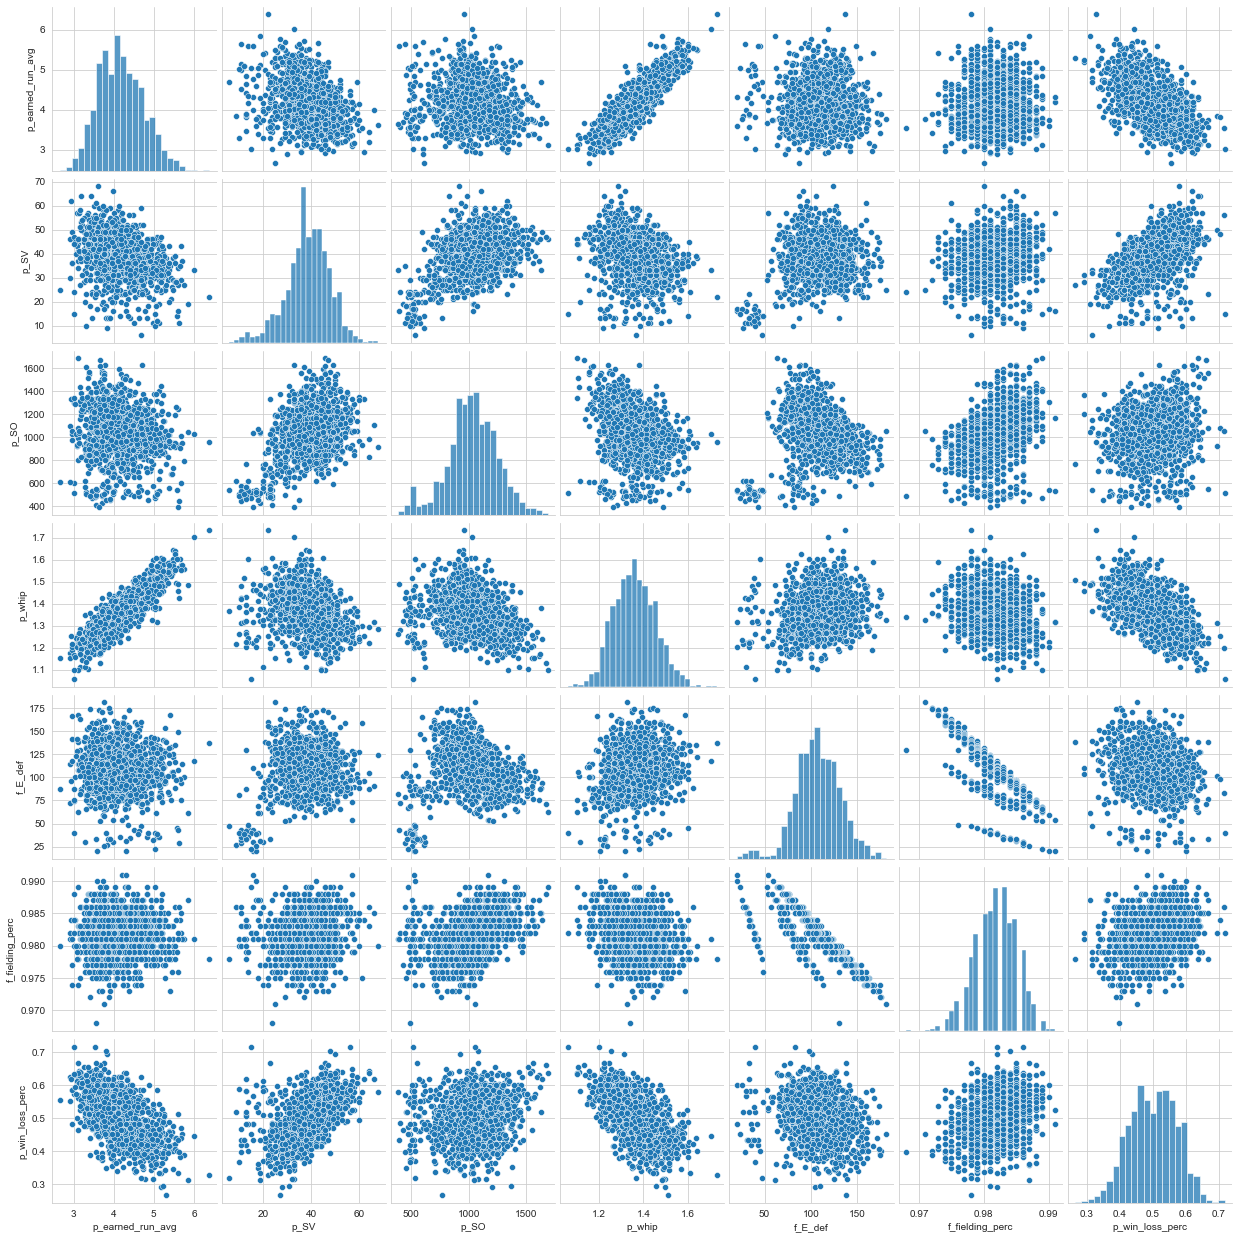

In [160]:
sns.pairplot(smaller_baseball.iloc[:, 6:13]);

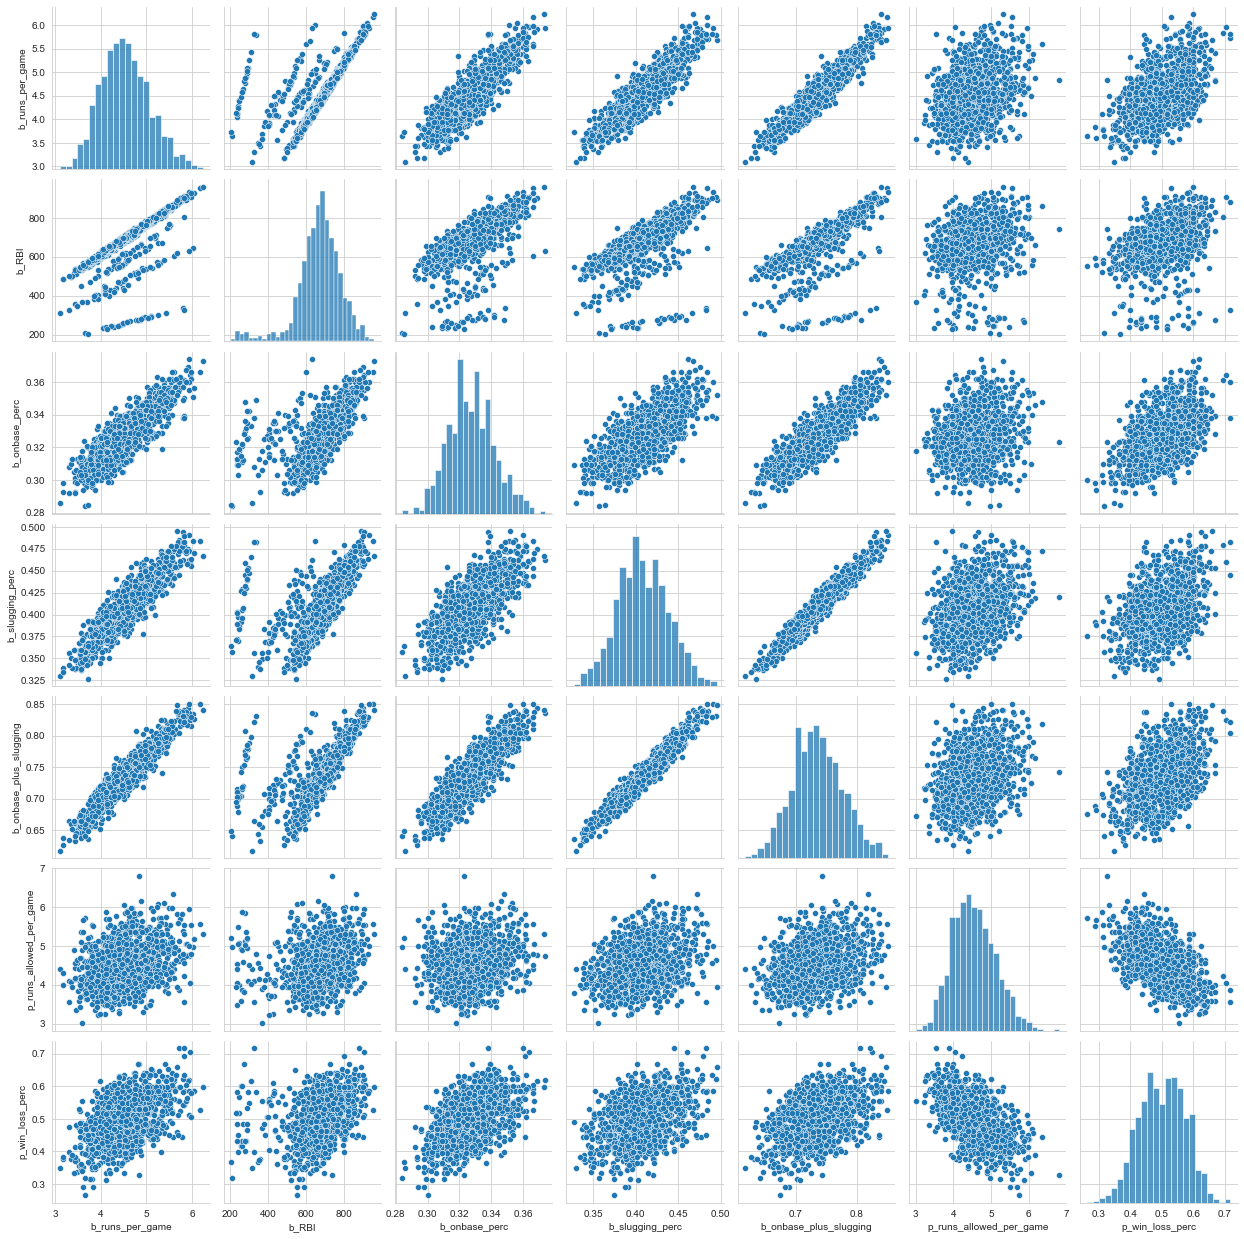

In [161]:
sns.pairplot(smaller_baseball.iloc[:, [0, 1, 2, 3, 4, 5, 12]]);

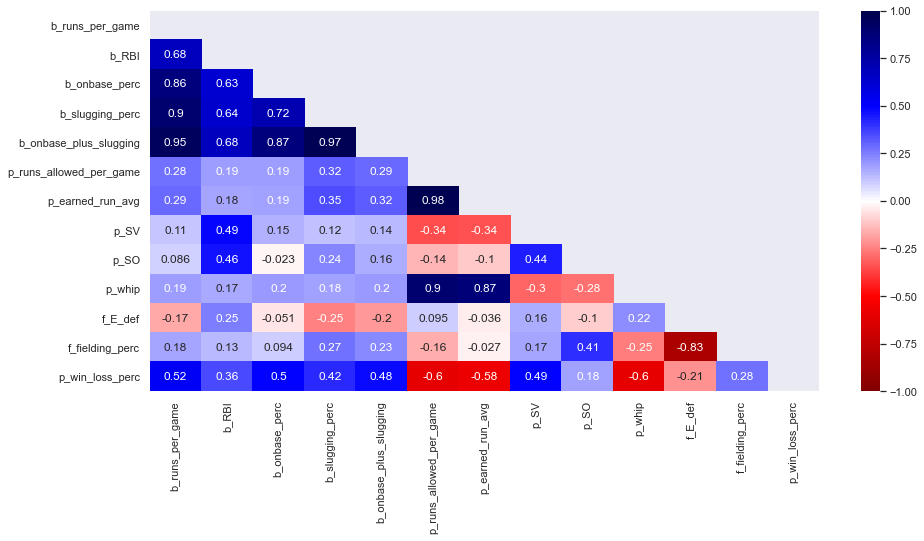

In [245]:
sns.set(rc = {'figure.figsize':(15, 7)})
upper = np.triu(smaller_baseball.corr())
sns.heatmap(smaller_baseball.corr(), cmap="seismic_r", annot=True, vmin=-1, vmax=1, mask=upper);
plt.savefig('correlation.png')

### There are three groups of features with high correlation with each other. We will do something with them later.
1. 
* b_runs_per_game
* b_onbase_perc
* b_slugging_perc
* b_onbase_plus_slugging

2. 
* p_runs_allowed_per_game
* p_earned_run_avg
* p_whip

3. 
* f_E_def
* f_fielding_perc

In [162]:
model = sm.OLS(y, X)
baseball_model = model.fit()
baseball_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        p_win_loss_perc   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     945.0
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:39:47   Log-Likelihood:                 2883.2
No. Observations:                1198   AIC:                            -5740.
Df Residuals:                    1185   BIC:                            -5674.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.7138      0.912     -0.782      0.434      -2.504       1.076
b_runs_per_game             0.0990      0.005     18.833      0.000       0.089       0.109
b_RBI                      -0.0001   2.66e-05     -4.191      0.000      -0.000   -5.92e-05
b_onbase_perc              -1.7850      1.317     -1.356      0.175      -4.368       0.798
b_slugging_perc            -1.9874      1.313     -1.514      0.130      -4.563       0.588
b_onbase_plus_slugging      2.0393      1.313      1.553      0.121      -0.536       4.615
p_runs_allowed_per_game    -0.0465      0.009     -5.063      0.000      -0.064      -0.028
p_earned_run_avg           -0.0312      0.009     -3.474      0.001      -0.049      -0.014
p_SV                        0.0020   9.83e-05     20.293      0.000       0.002       0.002
p_SO                      -1.2e-05   4.84e-06     -2.481      0.013   -2.15e-05   -2.51e-06
p_whip                     -0.0691      0.019     -3.714      0.000      -0.106      -0.033
f_E_def                  2.404e-05      0.000      0.162      0.872      -0.000       0.000
f_fielding_perc             1.1226      0.910      1.233      0.218      -0.663       2.908
==============================================================================
Omnibus:                        9.386   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.494
Skew:                           0.190   Prob(JB):                      0.00868
Kurtosis:                       3.213   Cond. No.                     4.50e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.5e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Standardize the variables for regularization later.

In [163]:
X = baseball[features]

std = StandardScaler()
std.fit(X.values)

X_std = std.transform(X.values)
X_std = pd.DataFrame(X_std, columns = X.columns)

In [164]:
X_std = sm.add_constant(X_std)
model = sm.OLS(y, X_std)
baseball_model = model.fit()
baseball_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        p_win_loss_perc   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     945.0
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:40:09   Log-Likelihood:                 2883.2
No. Observations:                1198   AIC:                            -5740.
Df Residuals:                    1185   BIC:                            -5674.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.5000      0.001    789.314      0.000       0.499       0.501
b_runs_per_game             0.0524      0.003     18.833      0.000       0.047       0.058
b_RBI                      -0.0129      0.003     -4.191      0.000      -0.019      -0.007
b_onbase_perc              -0.0259      0.019     -1.356      0.175      -0.063       0.012
b_slugging_perc            -0.0593      0.039     -1.514      0.130      -0.136       0.018
b_onbase_plus_slugging      0.0846      0.054      1.553      0.121      -0.022       0.191
p_runs_allowed_per_game    -0.0261      0.005     -5.063      0.000      -0.036      -0.016
p_earned_run_avg           -0.0175      0.005     -3.474      0.001      -0.027      -0.008
p_SV                        0.0181      0.001     20.293      0.000       0.016       0.020
p_SO                       -0.0026      0.001     -2.481      0.013      -0.005      -0.001
p_whip                     -0.0066      0.002     -3.714      0.000      -0.010      -0.003
f_E_def                     0.0006      0.004      0.162      0.872      -0.007       0.008
f_fielding_perc             0.0037      0.003      1.233      0.218      -0.002       0.010
==============================================================================
Omnibus:                        9.386   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.494
Skew:                           0.190   Prob(JB):                      0.00868
Kurtosis:                       3.213   Cond. No.                         239.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Checking for collinearity - VIF

In [165]:
vif = pd.DataFrame()
vif['variables'] = X_std.columns
vif['vif'] =[variance_inflation_factor(X_std.values, i) for i in range(X_std.shape[1])]
vif

,variables,vif
0,const,1.000000
1,b_runs_per_game,19.313375
2,b_RBI,23.535011
3,b_onbase_perc,907.850177
4,b_slugging_perc,3820.673060
5,b_onbase_plus_slugging,7385.279830
6,p_runs_allowed_per_game,66.474459
7,p_earned_run_avg,63.532673
8,p_SV,1.984259
9,p_SO,2.802231


## Remove columns with possibly high collinearity:
* b_onbase_perc	
* b_slugging_perc
* p_earned_run_avg

## and columns with coefficients that don't make sense:
* b_RBI
* p_SO

In [203]:
features_2 = ['b_runs_per_game', 'b_onbase_plus_slugging',
              'p_runs_allowed_per_game', 'p_SV', 'p_whip',
              'f_E_def', 'f_fielding_perc']
X = X_std[features_2]
y = baseball['p_win_loss_perc']
X = sm.add_constant(X)
model = sm.OLS(y, X)
baseball_model = model.fit()
baseball_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        p_win_loss_perc   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     1521.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:22:18   Log-Likelihood:                 2846.6
No. Observations:                1198   AIC:                            -5677.
Df Residuals:                    1190   BIC:                            -5637.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.5000      0.001    767.227      0.000       0.499       0.501
b_runs_per_game             0.0489      0.002     23.740      0.000       0.045       0.053
b_onbase_plus_slugging     -0.0001      0.002     -0.055      0.956      -0.004       0.004
p_runs_allowed_per_game    -0.0481      0.002    -29.791      0.000      -0.051      -0.045
p_SV                        0.0165      0.001     18.635      0.000       0.015       0.018
p_whip                     -0.0029      0.002     -1.855      0.064      -0.006       0.000
f_E_def                    -0.0149      0.001    -10.092      0.000      -0.018      -0.012
f_fielding_perc            -0.0125      0.001     -8.672      0.000      -0.015      -0.010
==============================================================================
Omnibus:                       12.832   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.043
Skew:                           0.197   Prob(JB):                     0.000893
Kurtosis:                       3.356   Cond. No.                         6.98
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [204]:
vif = pd.DataFrame()
vif['variables'] = X.columns
vif['vif'] =[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,variables,vif
0,const,1.000000
1,b_runs_per_game,9.994643
2,b_onbase_plus_slugging,10.568194
3,p_runs_allowed_per_game,6.148005
4,p_SV,1.856870
5,p_whip,5.946469
6,f_E_def,5.142398
7,f_fielding_perc,4.866099


## Checking for outliers

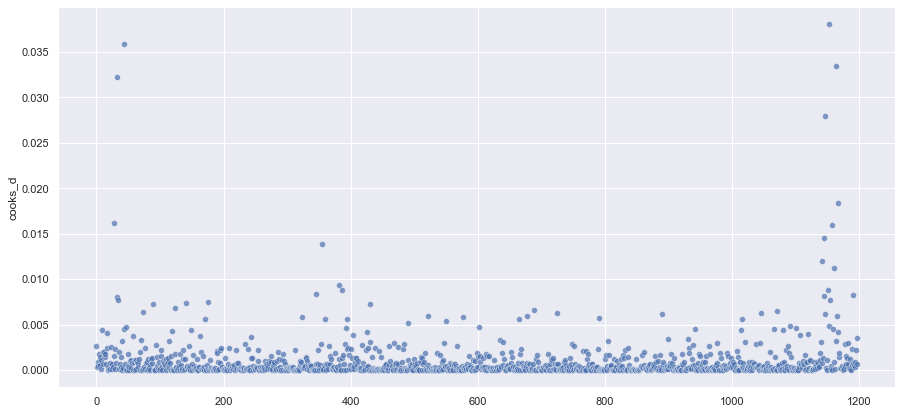

In [246]:
influence = baseball_model.get_influence()
influence_frame = influence.summary_frame().reset_index()
#influence_frame
sns.set(rc = {'figure.figsize':(15, 7)})
sns.scatterplot(y='cooks_d', x=influence_frame.index, data=influence_frame, alpha=0.7);
plt.savefig('influence_frame.png')

## Checking for collinearity - VIF

In [206]:
vif = pd.DataFrame()
vif['variables'] = X.columns
vif['vif'] =[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,variables,vif
0,const,1.000000
1,b_runs_per_game,9.994643
2,b_onbase_plus_slugging,10.568194
3,p_runs_allowed_per_game,6.148005
4,p_SV,1.856870
5,p_whip,5.946469
6,f_E_def,5.142398
7,f_fielding_perc,4.866099


It seems there is some collinearity, but I will deal with it with regularization later.

## Checking for normality - residuals should be normally distributed with a mean of zero

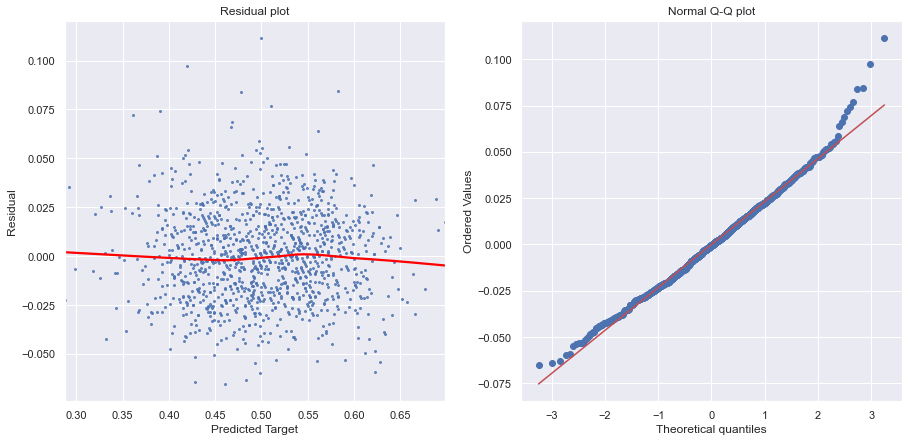

In [248]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
g = sns.regplot(x=baseball_model.fittedvalues, y=baseball_model.resid,
                lowess=True, line_kws={'color': 'red'}, scatter_kws={'s': 4})
g.set_xlabel('Predicted Target')
g.set_ylabel('Residual')
plt.title("Residual plot")

plt.subplot(1, 2, 2)
stats.probplot(baseball_model.resid, dist="norm", plot=plt)
plt.title("Normal Q-Q plot");

plt.savefig('residual_analysis.png')

## Let's try some regularization methods. Let's start with ridge regression.

In [207]:
X = X_std[features_2]
y = baseball['p_win_loss_perc']

# test train split
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [208]:
kf = KFold(n_splits=5, shuffle=True, random_state = 42)
alphas = np.logspace(-2, 2, 200)
ridge_model = RidgeCV(alphas=alphas, cv=kf)
ridge_model.fit(X, y)
print('Best lambda: ', ridge_model.alpha_)
print('Training score: ', ridge_model.score(X, y))

Best lambda:  0.1762914118095948
Training score:  0.9038001996863516


In [209]:
print("Test score: ", ridge_model.score(X_test, y_test))

Test score:  0.8798596594620395


In [210]:
# list the coefficients
list(zip(X.columns, ridge_model.coef_))

[('b_runs_per_game', 0.04645437579141192),
 ('b_onbase_plus_slugging', 0.0020547160361489092),
 ('p_runs_allowed_per_game', -0.048913009332740696),
 ('p_SV', 0.016678509523385232),
 ('p_whip', -0.0019365962198324225),
 ('f_E_def', -0.014835880532642417),
 ('f_fielding_perc', -0.012361950731387527)]

## Now Lasso regression

In [186]:
lasso_model = LassoCV(alphas=alphas, cv=kf)
lasso_model.fit(X, y)
print('Best lambda: ', lasso_model.alpha_)
print('Training score: ', lasso_model.score(X, y))

Best lambda:  0.01
Training score:  0.8383694267000724


In [187]:
print("Test score: ", lasso_model.score(X_test, y_test))

Test score:  0.8044797240418363


In [188]:
# list the coefficients
list(zip(X.columns, lasso_model.coef_))

[('b_runs_per_game', 0.037204388842446534),
 ('b_onbase_plus_slugging', 0.0),
 ('p_runs_allowed_per_game', -0.03772826496271291),
 ('p_SV', 0.006412327684855965),
 ('p_whip', -0.0033483991719034044),
 ('f_E_def', -0.0),
 ('f_fielding_perc', 0.0)]

## Elastic Net

In [189]:
l1_rats = [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]
enet_model = ElasticNetCV(alphas=alphas, l1_ratio=l1_rats, cv=kf)
enet_model.fit(X, y)
print('Best lambda: ', enet_model.alpha_)
print('Best L1 ratio: ', enet_model.l1_ratio_)
print('Training score: ', enet_model.score(X, y))

Best lambda:  0.01
Best L1 ratio:  0.1
Training score:  0.897785276111246


In [190]:
print("Test score: ", enet_model.score(X_test, y_test))

Test score:  0.8720777533895198


In [191]:
# list the coefficients
list(zip(X.columns, enet_model.coef_))

[('b_runs_per_game', 0.043536467450409656),
 ('b_onbase_plus_slugging', 0.003648950190042143),
 ('p_runs_allowed_per_game', -0.045645662462953464),
 ('p_SV', 0.012271433275940954),
 ('p_whip', -0.004574224692834571),
 ('f_E_def', -0.004481680098507793),
 ('f_fielding_perc', -0.002063088272598602)]

## Ridge regression seems to be the best for now.

Dropping **b_onbase_plus_slugging** to see if collinearity issue improves.

In [215]:
features_3 = ['b_runs_per_game',
              'p_runs_allowed_per_game', 'p_SV', 'p_whip',
              'f_E_def', 'f_fielding_perc']

X = X_std[features_3]
y = baseball['p_win_loss_perc']
X = sm.add_constant(X)
model = sm.OLS(y, X)
baseball_model = model.fit()
baseball_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        p_win_loss_perc   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     1776.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:29:21   Log-Likelihood:                 2846.6
No. Observations:                1198   AIC:                            -5679.
Df Residuals:                    1191   BIC:                            -5644.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.5000      0.001    767.548      0.000       0.499       0.501
b_runs_per_game             0.0488      0.001     67.323      0.000       0.047       0.050
p_runs_allowed_per_game    -0.0481      0.002    -29.906      0.000      -0.051      -0.045
p_SV                        0.0165      0.001     18.774      0.000       0.015       0.018
p_whip                     -0.0029      0.002     -1.856      0.064      -0.006       0.000
f_E_def                    -0.0149      0.001    -10.096      0.000      -0.018      -0.012
f_fielding_perc            -0.0125      0.001     -8.724      0.000      -0.015      -0.010
==============================================================================
Omnibus:                       12.844   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.059
Skew:                           0.197   Prob(JB):                     0.000886
Kurtosis:                       3.356   Cond. No.                         5.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [216]:
vif = pd.DataFrame()
vif['variables'] = X.columns
vif['vif'] =[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,variables,vif
0,const,1.000000
1,b_runs_per_game,1.238444
2,p_runs_allowed_per_game,6.107684
3,p_SV,1.829660
4,p_whip,5.945939
5,f_E_def,5.142063
6,f_fielding_perc,4.818701


Dropping **p_whip** and **f_fielding_perc**.

In [234]:
features_4 = ['b_runs_per_game',
              'p_runs_allowed_per_game', 'p_SV',
              'f_E_def']
X = X_std[features_4]
y = baseball['p_win_loss_perc']
X = sm.add_constant(X)
model = sm.OLS(y, X)
baseball_model = model.fit()
baseball_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        p_win_loss_perc   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     2479.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:18:01   Log-Likelihood:                 2807.3
No. Observations:                1198   AIC:                            -5605.
Df Residuals:                    1193   BIC:                            -5579.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.5000      0.001    743.349      0.000       0.499       0.501
b_runs_per_game             0.0492      0.001     65.953      0.000       0.048       0.051
p_runs_allowed_per_game    -0.0514      0.001    -65.353      0.000      -0.053      -0.050
p_SV                        0.0124      0.001     16.254      0.000       0.011       0.014
f_E_def                    -0.0041      0.001     -5.795      0.000      -0.006      -0.003
==============================================================================
Omnibus:                       31.909   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.294
Skew:                           0.328   Prob(JB):                     4.84e-09
Kurtosis:                       3.581   Cond. No.                         1.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [239]:
X = X_std[features_4]
y = baseball['p_win_loss_perc']

X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X, y)

# Check the R-squared value of the model on the training data
print('Train score: ', lr.score(X, y))
print('Test score: ', lr.score(X_test, y_test))

Train score:  0.8971392197454201
Test score:  0.8729997292407086


In [240]:
vif = pd.DataFrame()
vif['variables'] = X.columns
vif['vif'] =[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,variables,vif
0,b_runs_per_game,1.236726
1,p_runs_allowed_per_game,1.371573
2,p_SV,1.311309
3,f_E_def,1.157497


## Let's try ridge regression on feature candidate 4.

In [222]:
X = X_std[features_4]
y = baseball['p_win_loss_perc']

# test train split
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state = 42)
alphas = np.logspace(-2, 2, 200)
ridge_model = RidgeCV(alphas=alphas, cv=kf)
ridge_model.fit(X, y)
print('Best lambda: ', ridge_model.alpha_)
print('Training score: ', ridge_model.score(X, y))

Best lambda:  1.0234114021054528
Training score:  0.8971375145786544


In [223]:
print("Test score: ", ridge_model.score(X_test, y_test))

Test score:  0.8729259889763863


In [224]:
# list the coefficients
list(zip(X.columns, ridge_model.coef_))

[('b_runs_per_game', 0.04862423370703273),
 ('p_runs_allowed_per_game', -0.05107062993886461),
 ('p_SV', 0.012406424265560066),
 ('f_E_def', -0.004137979389797289)]

### The test score went down for about 0.025. It seems to be fine.